In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [2]:
probadf = pd.DataFrame()

In [3]:
df = pd.read_csv('final_combined_dataset.csv')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,0,0,15,0,0,1,1,1,0,2,...,3,1,2,1,1,1,4,13,13,13
1,0,0,15,0,0,1,1,1,2,2,...,3,3,4,2,4,5,2,13,11,11
2,0,0,15,0,0,1,2,2,0,2,...,4,3,1,1,1,2,8,14,13,12
3,0,0,15,0,0,1,2,4,3,1,...,4,3,2,1,1,5,2,10,11,10
4,0,0,15,0,0,1,3,3,3,3,...,4,2,1,2,3,3,2,13,13,13


In [5]:
df = df.rename(columns = {'Unnamed: 0':'ID'})

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

In [7]:
xfeatures = ['G1.x','G3.x','school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian.x','nursery','internet','famsup.x']

In [8]:
yfeatures = ['G1.y','G3.y','school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian.y','nursery','internet','famsup.y']

In [9]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [10]:
fildf = df.loc[:,keepcol]

In [11]:
fildf_x = fildf.loc[:,xfeatures]

In [12]:
fildf_y = fildf.loc[:,yfeatures]

In [13]:
fildf_x.shape

(882, 17)

In [14]:
fildf_y.shape

(882, 17)

In [15]:
def convertmarks(mark):
    if mark<10:
        return 'B'
    else:
        return 'A'

In [16]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [17]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [18]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [19]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [20]:
fildf_y['New G3']

0      A
1      A
2      A
3      A
4      A
      ..
877    A
878    A
879    A
880    A
881    A
Name: New G3, Length: 882, dtype: object

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [23]:
fildf_y['New G3']

0      0
1      0
2      0
3      0
4      0
      ..
877    0
878    0
879    0
880    0
881    0
Name: New G3, Length: 882, dtype: int64

In [24]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [25]:
fildf_x = fildf_x.drop(['G1.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G3.y'],axis=1)

In [26]:
features_x_G3 = fildf_x.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y.drop(['New G1','New G3'],axis=1)

In [27]:
target_x_G3 = fildf_x['New G3']
target_x_G1 = fildf_x['New G1']
target_y_G3 = fildf_y['New G3']
target_y_G1 = fildf_y['New G1']

In [28]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [29]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [30]:
clf = GaussianNB()

In [31]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
probagnbG1x = clf.predict_proba(X_test_x_G1)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       209
           1       0.09      0.42      0.14        12

    accuracy                           0.73       221
   macro avg       0.52      0.58      0.49       221
weighted avg       0.91      0.73      0.80       221

Kappa Score: 0.058104844438130354


In [32]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
probagnbG3x = clf.predict_proba(X_test_x_G3)

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       194
           1       0.11      0.30      0.16        27

    accuracy                           0.63       221
   macro avg       0.49      0.49      0.46       221
weighted avg       0.78      0.63      0.69       221

Kappa Score: -0.016719030520646383


In [33]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
probagnbG1y = clf.predict_proba(X_test_y_G1)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       204
           1       0.46      0.35      0.40        17

    accuracy                           0.92       221
   macro avg       0.70      0.66      0.68       221
weighted avg       0.91      0.92      0.91       221

Kappa Score: 0.3571428571428571


In [34]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
probagnbG3y = clf.predict_proba(X_test_y_G3)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       210
           1       0.30      0.27      0.29        11

    accuracy                           0.93       221
   macro avg       0.63      0.62      0.63       221
weighted avg       0.93      0.93      0.93       221

Kappa Score: 0.2501696448767248


In [35]:
proba_gnbG1x = []
for i in range(len(probagnbG1x)):
    proba_gnbG1x.append(round(probagnbG1x[i][1],4))
proba_gnbG3x = []
for i in range(len(probagnbG3x)):
    proba_gnbG3x.append(round(probagnbG3x[i][1],4))
proba_gnbG1y = []
for i in range(len(probagnbG1y)):
    proba_gnbG1y.append(round(probagnbG1y[i][1],4))
proba_gnbG3y = []
for i in range(len(probagnbG3y)):
    proba_gnbG3y.append(round(probagnbG3y[i][1],4))
probadf["Prob of G1x Using GNB"] = proba_gnbG1x
probadf["Prob of G3x Using GNB"] = proba_gnbG3x
probadf["Prob of G1y Using GNB"] = proba_gnbG1y
probadf["Prob of G3y Using GNB"] = proba_gnbG3y

In [36]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB
0,0.1563,0.3578,0.0004,0.0000
1,0.1821,0.3547,0.2822,0.4112
2,0.1794,0.1967,0.0176,0.0205
3,0.2635,0.2354,0.0424,0.0200
4,0.7185,0.4417,0.0938,0.0336
...,...,...,...,...
216,0.1454,0.1965,0.0734,0.0306
217,0.1021,0.1278,0.0150,0.0031
218,0.1304,0.1756,0.0575,0.0043
219,0.1045,0.1714,0.0365,0.0009


### Decision Tree

In [37]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       162
           1       0.36      0.36      0.36        59

    accuracy                           0.66       221
   macro avg       0.56      0.56      0.56       221
weighted avg       0.66      0.66      0.66       221

Kappa Score: 0.12822805448903374
	
Feature Medu and its importance is 0.13694240103222688
Feature reason and its importance is 0.12448805331397841
Feature Fjob and its importance is 0.11507669227928903
Feature age and its importance is 0.10951737056817479
Feature Mjob and its importance is 0.10733083183025867
Feature Fedu and its importance is 0.09293490215212807
Feature famsize and its importance is 0.05764517165203918
Feature famsup.x and its importance is 0.04873368253373825
Feature address and its importance is 0.04800316609531896
Feature internet and its importance is 0.03341354445516988
Feature Pstatus and its importance is 0.03148063509166298
Feature guardia

([<matplotlib.axis.XTick at 0x7ff6e72efb10>,
 <a list of 15 Text xticklabel objects>)

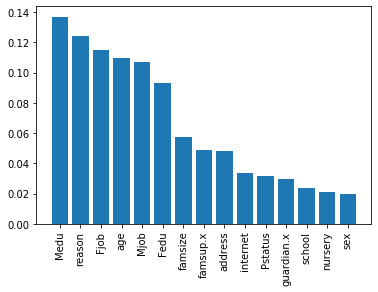

In [38]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
probadtcG1x = dtc.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       134
           1       0.49      0.40      0.44        87

    accuracy                           0.60       221
   macro avg       0.57      0.57      0.57       221
weighted avg       0.59      0.60      0.59       221

Kappa Score: 0.13809608225491943
	
Feature Fjob and its importance is 0.10793799152521627
Feature Mjob and its importance is 0.10656131946902221
Feature Medu and its importance is 0.09742001766290086
Feature reason and its importance is 0.09374770472082714
Feature age and its importance is 0.07925617616714954
Feature famsize and its importance is 0.07743761874761945
Feature Fedu and its importance is 0.07405858259029789
Feature address and its importance is 0.05783432753981356
Feature sex and its importance is 0.05718856750264223
Feature nursery and its importance is 0.0557826880762197
Feature guardian.x and its importance is 0.0529677302877865
Feature famsup.x and

([<matplotlib.axis.XTick at 0x7ff6e7607490>,
 <a list of 15 Text xticklabel objects>)

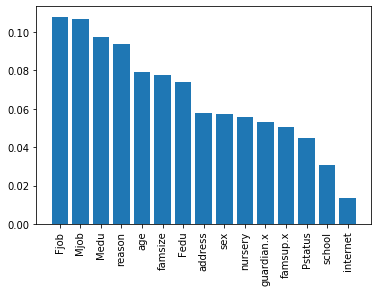

In [39]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
probadtcG3x = dtc.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       195
           1       0.00      0.00      0.00        26

    accuracy                           0.82       221
   macro avg       0.44      0.47      0.45       221
weighted avg       0.77      0.82      0.80       221

Kappa Score: -0.08510638297872353
	
Feature reason and its importance is 0.14361519119935795
Feature Medu and its importance is 0.10340798651211895
Feature age and its importance is 0.10246404360132483
Feature nursery and its importance is 0.09571034780624126
Feature Mjob and its importance is 0.08622520807515115
Feature guardian.y and its importance is 0.07707039368601065
Feature school and its importance is 0.0685288208126874
Feature Fedu and its importance is 0.0601191005308205
Feature sex and its importance is 0.05802242778732803
Feature Fjob and its importance is 0.05117190583665772
Feature famsup.y and its importance is 0.0495910627845991
Feature internet and

([<matplotlib.axis.XTick at 0x7ff6e7671250>,
 <a list of 15 Text xticklabel objects>)

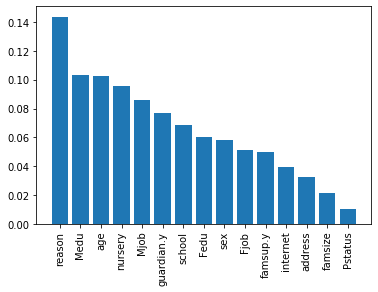

In [40]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
probadtcG1y = dtc.predict_proba(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       208
           1       0.20      0.15      0.17        13

    accuracy                           0.91       221
   macro avg       0.57      0.56      0.56       221
weighted avg       0.90      0.91      0.91       221

Kappa Score: 0.12938005390835583
	
Feature age and its importance is 0.15690949463733525
Feature guardian.y and its importance is 0.12896752923131746
Feature Medu and its importance is 0.1239119961285805
Feature reason and its importance is 0.11191915529976473
Feature Mjob and its importance is 0.08503560941674766
Feature Fjob and its importance is 0.06380519052365027
Feature address and its importance is 0.05691869353698632
Feature Fedu and its importance is 0.054508709246852714
Feature famsup.y and its importance is 0.049617108575852144
Feature internet and its importance is 0.04943602423798404
Feature sex and its importance is 0.045897485212233836
Feature school

([<matplotlib.axis.XTick at 0x7ff6e784ab90>,
 <a list of 15 Text xticklabel objects>)

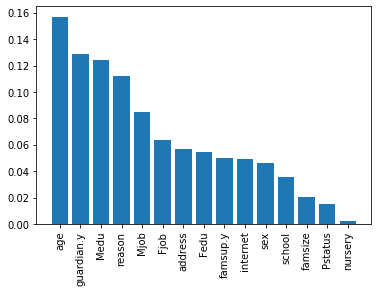

In [41]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
probadtcG3y = dtc.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)


In [42]:
proba_dtcG1x = []
for i in range(len(probadtcG1x)):
    proba_dtcG1x.append(round(probadtcG1x[i][1],4))
proba_dtcG3x = []
for i in range(len(probadtcG3x)):
    proba_dtcG3x.append(round(probadtcG3x[i][1],4))
proba_dtcG1y = []
for i in range(len(probadtcG1y)):
    proba_dtcG1y.append(round(probadtcG1y[i][1],4))
proba_dtcG3y = []
for i in range(len(probadtcG3y)):
    proba_dtcG3y.append(round(probadtcG3y[i][1],4))
probadf["Prob of G1x Using DTC"] = proba_dtcG1x
probadf["Prob of G3x Using DTC"] = proba_dtcG3x
probadf["Prob of G1y Using DTC"] = proba_dtcG1y
probadf["Prob of G3y Using DTC"] = proba_dtcG3y

In [43]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC
0,0.1563,0.3578,0.0004,0.0000,0.0,0.0,0.0,0.0
1,0.1821,0.3547,0.2822,0.4112,0.0,0.0,0.0,0.0
2,0.1794,0.1967,0.0176,0.0205,0.0,0.0,0.0,0.0
3,0.2635,0.2354,0.0424,0.0200,0.0,0.0,1.0,0.0
4,0.7185,0.4417,0.0938,0.0336,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
216,0.1454,0.1965,0.0734,0.0306,0.0,0.0,1.0,0.0
217,0.1021,0.1278,0.0150,0.0031,0.0,0.0,0.0,1.0
218,0.1304,0.1756,0.0575,0.0043,0.0,0.0,0.0,0.0
219,0.1045,0.1714,0.0365,0.0009,0.0,0.0,1.0,0.0


### Random Forest Classifier

In [44]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       208
           1       0.10      0.46      0.17        13

    accuracy                           0.73       221
   macro avg       0.53      0.61      0.50       221
weighted avg       0.91      0.73      0.80       221

Kappa Score: 0.08065994500458284
	
Feature Fedu and its importance is 0.11906367715109167
Feature Mjob and its importance is 0.11662330442664777
Feature age and its importance is 0.11573320478618725
Feature Medu and its importance is 0.10836991784502562
Feature reason and its importance is 0.10465268363362938
Feature Fjob and its importance is 0.0907531926036551
Feature guardian.x and its importance is 0.05663586903230927
Feature famsup.x and its importance is 0.047417001076520714
Feature sex and its importance is 0.044504298591080016
Feature famsize and its importance is 0.04085416173813137
Feature address and its importance is 0.0400469875992755
Feature nursery a

([<matplotlib.axis.XTick at 0x7ff6e78dd350>,
 <a list of 15 Text xticklabel objects>)

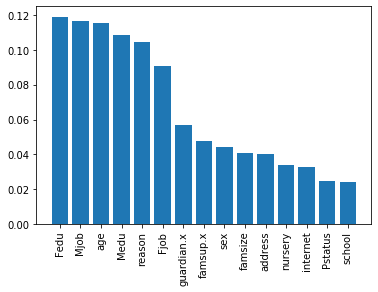

In [45]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
probarfG1x = rf.predict_proba(X_test_x_G1)

print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.93      0.69      0.80       202
           1       0.13      0.47      0.20        19

    accuracy                           0.67       221
   macro avg       0.53      0.58      0.50       221
weighted avg       0.86      0.67      0.74       221

Kappa Score: 0.07445323406235471
	
Feature age and its importance is 0.12033589895235636
Feature Mjob and its importance is 0.1163968558631451
Feature Medu and its importance is 0.1090888303419043
Feature Fedu and its importance is 0.10679855790534398
Feature reason and its importance is 0.10102165986978028
Feature Fjob and its importance is 0.09087734310271606
Feature guardian.x and its importance is 0.06164795560120307
Feature sex and its importance is 0.04857367174788154
Feature famsize and its importance is 0.04562933716242792
Feature famsup.x and its importance is 0.04238644759416144
Feature nursery and its importance is 0.0377244915569895
Feature address and 

([<matplotlib.axis.XTick at 0x7ff6e79a5410>,
 <a list of 15 Text xticklabel objects>)

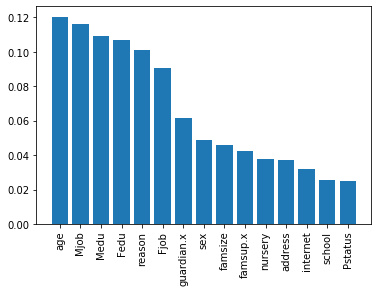

In [46]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
probarfG3x = rf.predict_proba(X_test_x_G3)

print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       220
           1       0.00      0.00      0.00         1

    accuracy                           0.94       221
   macro avg       0.50      0.47      0.48       221
weighted avg       0.99      0.94      0.96       221

Kappa Score: -0.008474576271186418
	
Feature age and its importance is 0.12500109807144383
Feature Medu and its importance is 0.10361717047826127
Feature Mjob and its importance is 0.09916020639936167
Feature Fedu and its importance is 0.09718474442519555
Feature reason and its importance is 0.09562135070927519
Feature Fjob and its importance is 0.07617242080049332
Feature guardian.y and its importance is 0.0622573327764837
Feature address and its importance is 0.05535550530434652
Feature sex and its importance is 0.05513819223148034
Feature famsup.y and its importance is 0.05475886503632815
Feature school and its importance is 0.048792089596580004
Feature nursery 

([<matplotlib.axis.XTick at 0x7ff6e7c90750>,
 <a list of 15 Text xticklabel objects>)

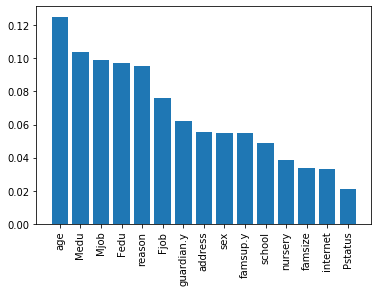

In [47]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
probarfG1y = rf.predict_proba(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       219
           1       0.00      0.00      0.00         2

    accuracy                           0.95       221
   macro avg       0.50      0.48      0.49       221
weighted avg       0.98      0.95      0.96       221

Kappa Score: -0.015313935681469992
	
Feature age and its importance is 0.12370582955290663
Feature Medu and its importance is 0.10764563324232455
Feature reason and its importance is 0.09855078884555103
Feature Fedu and its importance is 0.09519481002142276
Feature Mjob and its importance is 0.08509552494550109
Feature Fjob and its importance is 0.08007980369389006
Feature school and its importance is 0.07931056678461759
Feature guardian.y and its importance is 0.06039586211373455
Feature famsup.y and its importance is 0.05990670675962672
Feature address and its importance is 0.04836348441213499
Feature sex and its importance is 0.04674796152002915
Feature famsize 

([<matplotlib.axis.XTick at 0x7ff6e7de4b50>,
 <a list of 15 Text xticklabel objects>)

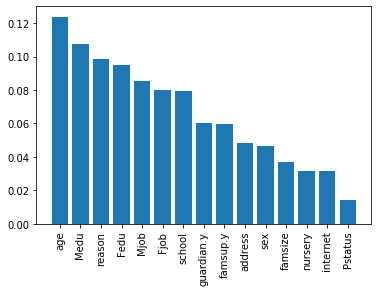

In [48]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
probarfG3y = rf.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

In [49]:
proba_rfG1x = []
for i in range(len(probarfG1x)):
    proba_rfG1x.append(round(probarfG1x[i][1],4))
proba_rfG3x = []
for i in range(len(probarfG3x)):
    proba_rfG3x.append(round(probarfG3x[i][1],4))
proba_rfG1y = []
for i in range(len(probarfG1y)):
    proba_rfG1y.append(round(probarfG1y[i][1],4))
proba_rfG3y = []
for i in range(len(probarfG3y)):
    proba_rfG3y.append(round(probarfG3y[i][1],4))
probadf["Prob of G1x Using RF"] = proba_rfG1x
probadf["Prob of G3x Using RF"] = proba_rfG3x
probadf["Prob of G1y Using RF"] = proba_rfG1y
probadf["Prob of G3y Using RF"] = proba_rfG3y

In [50]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC,Prob of G1x Using RF,Prob of G3x Using RF,Prob of G1y Using RF,Prob of G3y Using RF
0,0.1563,0.3578,0.0004,0.0000,0.0,0.0,0.0,0.0,0.3000,0.2100,0.03,0.01
1,0.1821,0.3547,0.2822,0.4112,0.0,0.0,0.0,0.0,0.0500,0.1200,0.06,0.03
2,0.1794,0.1967,0.0176,0.0205,0.0,0.0,0.0,0.0,0.3300,0.4800,0.00,0.00
3,0.2635,0.2354,0.0424,0.0200,0.0,0.0,1.0,0.0,0.1275,0.1800,0.12,0.01
4,0.7185,0.4417,0.0938,0.0336,1.0,1.0,0.0,0.0,0.6600,0.5700,0.12,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.1454,0.1965,0.0734,0.0306,0.0,0.0,1.0,0.0,0.0500,0.2000,0.06,0.05
217,0.1021,0.1278,0.0150,0.0031,0.0,0.0,0.0,1.0,0.2400,0.2600,0.05,0.05
218,0.1304,0.1756,0.0575,0.0043,0.0,0.0,0.0,0.0,0.1700,0.1967,0.07,0.01
219,0.1045,0.1714,0.0365,0.0009,0.0,0.0,1.0,0.0,0.1800,0.2700,0.09,0.02


### Linear SVM

In [51]:
from sklearn import svm
lsvm = svm.SVC(kernel='linear', probability = True)

In [52]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
probalsvmG1x = lsvm.predict_proba(X_test_x_G1)

print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       221
           1       0.00      0.00      0.00         0

    accuracy                           0.74       221
   macro avg       0.50      0.37      0.42       221
weighted avg       1.00      0.74      0.85       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
probalsvmG3x = lsvm.predict_proba(X_test_x_G3)

print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       221
           1       0.00      0.00      0.00         0

    accuracy                           0.68       221
   macro avg       0.50      0.34      0.40       221
weighted avg       1.00      0.68      0.81       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
probalsvmG1y = lsvm.predict_proba(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       221
           1       0.00      0.00      0.00         0

    accuracy                           0.94       221
   macro avg       0.50      0.47      0.48       221
weighted avg       1.00      0.94      0.97       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
probalsvmG3y = lsvm.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       221
           1       0.00      0.00      0.00         0

    accuracy                           0.95       221
   macro avg       0.50      0.48      0.49       221
weighted avg       1.00      0.95      0.98       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:

proba_lsvmG1x = []
for i in range(len(probalsvmG1x)):
    proba_lsvmG1x.append(round(probalsvmG1x[i][1],4))
proba_lsvmG3x = []
for i in range(len(probalsvmG3x)):
    proba_lsvmG3x.append(round(probalsvmG3x[i][1],4))
proba_lsvmG1y = []
for i in range(len(probalsvmG1y)):
    proba_lsvmG1y.append(round(probalsvmG1y[i][1],4))
proba_lsvmG3y = []
for i in range(len(probalsvmG3y)):
    proba_lsvmG3y.append(round(probalsvmG3y[i][1],4))
probadf["Prob of G1x Using LSVM"] = proba_lsvmG1x
probadf["Prob of G3x Using LSVM"] = proba_lsvmG3x
probadf["Prob of G1y Using LSVM"] = proba_lsvmG1y
probadf["Prob of G3y Using LSVM"] = proba_lsvmG3y

### Logistic Regression

In [57]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [58]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
probalgG1x = lg.predict_proba(X_test_x_G1)

print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       221
           1       0.00      0.00      0.00         0

    accuracy                           0.74       221
   macro avg       0.50      0.37      0.42       221
weighted avg       1.00      0.74      0.85       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
probalgG3x = lg.predict_proba(X_test_x_G3)

print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       218
           1       0.03      0.67      0.05         3

    accuracy                           0.68       221
   macro avg       0.51      0.68      0.43       221
weighted avg       0.98      0.68      0.80       221

Kappa Score: 0.02875439477649422


In [60]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
probalgG1y = lg.predict_proba(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       221
           1       0.00      0.00      0.00         0

    accuracy                           0.94       221
   macro avg       0.50      0.47      0.48       221
weighted avg       1.00      0.94      0.97       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
probalgG3y = lg.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       221
           1       0.00      0.00      0.00         0

    accuracy                           0.95       221
   macro avg       0.50      0.48      0.49       221
weighted avg       1.00      0.95      0.98       221

Kappa Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:

proba_lgG1x = []
for i in range(len(probalgG1x)):
    proba_lgG1x.append(round(probalgG1x[i][1],4))
proba_lgG3x = []
for i in range(len(probalgG3x)):
    proba_lgG3x.append(round(probalgG3x[i][1],4))
proba_lgG1y = []
for i in range(len(probalgG1y)):
    proba_lgG1y.append(round(probalgG1y[i][1],4))
proba_lgG3y = []
for i in range(len(probalgG3y)):
    proba_lgG3y.append(round(probalgG3y[i][1],4))
probadf["Prob of G1x Using LG"] = proba_lgG1x
probadf["Prob of G3x Using LG"] = proba_lgG3x
probadf["Prob of G1y Using LG"] = proba_lgG1y
probadf["Prob of G3y Using LG"] = proba_lgG3y

In [63]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC,Prob of G1x Using RF,Prob of G3x Using RF,Prob of G1y Using RF,Prob of G3y Using RF,Prob of G1x Using LSVM,Prob of G3x Using LSVM,Prob of G1y Using LSVM,Prob of G3y Using LSVM,Prob of G1x Using LG,Prob of G3x Using LG,Prob of G1y Using LG,Prob of G3y Using LG
0,0.1563,0.3578,0.0004,0.0000,0.0,0.0,0.0,0.0,0.3000,0.2100,0.03,0.01,0.2349,0.3410,0.0324,0.0125,0.2087,0.3475,0.0301,0.0116
1,0.1821,0.3547,0.2822,0.4112,0.0,0.0,0.0,0.0,0.0500,0.1200,0.06,0.03,0.2104,0.3036,0.1107,0.0796,0.1791,0.2573,0.1258,0.0783
2,0.1794,0.1967,0.0176,0.0205,0.0,0.0,0.0,0.0,0.3300,0.4800,0.00,0.00,0.2620,0.3150,0.1171,0.0418,0.2297,0.3037,0.0341,0.0237
3,0.2635,0.2354,0.0424,0.0200,0.0,0.0,1.0,0.0,0.1275,0.1800,0.12,0.01,0.2291,0.2930,0.0723,0.0378,0.2025,0.2342,0.0349,0.0379
4,0.7185,0.4417,0.0938,0.0336,1.0,1.0,0.0,0.0,0.6600,0.5700,0.12,0.04,0.2318,0.2673,0.0875,0.0506,0.4460,0.3335,0.0574,0.0222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.1454,0.1965,0.0734,0.0306,0.0,0.0,1.0,0.0,0.0500,0.2000,0.06,0.05,0.2591,0.3298,0.1392,0.0612,0.1794,0.2461,0.1318,0.0471
217,0.1021,0.1278,0.0150,0.0031,0.0,0.0,0.0,1.0,0.2400,0.2600,0.05,0.05,0.2287,0.2764,0.1185,0.0169,0.1302,0.1389,0.0300,0.0085
218,0.1304,0.1756,0.0575,0.0043,0.0,0.0,0.0,0.0,0.1700,0.1967,0.07,0.01,0.2563,0.2716,0.0954,0.0524,0.2846,0.2461,0.1145,0.0200
219,0.1045,0.1714,0.0365,0.0009,0.0,0.0,1.0,0.0,0.1800,0.2700,0.09,0.02,0.2454,0.2884,0.1144,0.0382,0.2153,0.1894,0.0849,0.0082


### Gradient Boosting

In [64]:
gb = GradientBoostingClassifier(random_state=0)

In [65]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
probagbG1x = gb.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       209
           1       0.10      0.50      0.17        12

    accuracy                           0.74       221
   macro avg       0.53      0.63      0.51       221
weighted avg       0.92      0.74      0.81       221

Kappa Score: 0.08950134962352596


In [66]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)

probagbG3x = gb.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       193
           1       0.15      0.39      0.22        28

    accuracy                           0.65       221
   macro avg       0.52      0.54      0.50       221
weighted avg       0.79      0.65      0.71       221

Kappa Score: 0.049488912472769986


In [67]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)

probagbG1y = gb.predict_proba(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       219
           1       0.00      0.00      0.00         2

    accuracy                           0.93       221
   macro avg       0.50      0.47      0.48       221
weighted avg       0.98      0.93      0.96       221

Kappa Score: -0.015936254980079667


In [68]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)

probagbG3y = gb.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       219
           1       0.00      0.00      0.00         2

    accuracy                           0.95       221
   macro avg       0.50      0.48      0.49       221
weighted avg       0.98      0.95      0.96       221

Kappa Score: -0.015313935681469992


In [69]:

proba_gbG1x = []
for i in range(len(probagbG1x)):
    proba_gbG1x.append(round(probagbG1x[i][1],4))
proba_gbG3x = []
for i in range(len(probagbG3x)):
    proba_gbG3x.append(round(probagbG3x[i][1],4))
proba_gbG1y = []
for i in range(len(probagbG1y)):
    proba_gbG1y.append(round(probagbG1y[i][1],4))
proba_gbG3y = []
for i in range(len(probagbG3y)):
    proba_gbG3y.append(round(probagbG3y[i][1],4))
probadf["Prob of G1x Using GB"] = proba_gbG1x
probadf["Prob of G3x Using GB"] = proba_gbG3x
probadf["Prob of G1y Using GB"] = proba_gbG1y
probadf["Prob of G3y Using GB"] = proba_gbG3y

In [70]:
probadf.shape

(221, 24)

In [71]:
probadf.to_csv('Demographic_Fail_Prob_Binary.csv')